In [ ]:
import zipfile

dplk_path = "C:\Users\HP\OneDrive\Documents\ByteBash\OilSpillDetection_SAR.dlpk"  # Change filename accordingly
extract_path = "C:\Users\HP\OneDrive\Documents\ByteBash\extracted_model"

# Extract the .dplk file
with zipfile.ZipFile(dplk_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed.")


BadZipFile: File is not a zip file

In [2]:
!cat /content/extracted_model/OilSpillDetection_SAR.emd


{
    "ModelParameters": {
        "pointrend": false,
        "backbone": "resnet50",
        "backend": "pytorch"
    },
    "Framework": "arcgis.learn.models._inferencing",
    "ModelConfiguration": "_maskrcnn_inferencing",
    "InferenceFunction": "ArcGISInstanceDetector.py",
    "ModelType": "InstanceDetection",
    "MaskRCNNkwargs": {},
    "ExtractBands": [
        0,
        1,
        2
    ],
    "SupportsVariableTileSize": true,
    "Classes": [
        {
            "Value": 1,
            "Name": "1",
            "Color": [
                66,
                206,
                144
            ]
        }
    ],
    "ModelFormat": "NCHW",
    "MinCellSize": {
        "x": 0.0001033159891796251,
        "y": 0.00010331598917962494,
        "spatialReference": {
            "wkid": 4326,
            "latestWkid": 4326
        }
    },
    "MaxCellSize": {
        "x": 0.0001775814290221391,
        "y": 0.0001775814290221389,
        "spatialReference": {
            "wkid

In [5]:
!pip install -q arcgis fastai
!pip install --upgrade pandas==2.2.2 requests==2.32.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arcgis 2.4.0 requires pandas<2.2.0,>=2.0.0, but you have pandas 2.2.2 which is incompatible.
arcgis 2.4.0 requires requests<2.32.0,>=2.30.0, but you have requests 2.32.3 which is incompatible.


In [2]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu


Looking in indexes: https://download.pytorch.org/whl/cpu


In [3]:
!pip install --upgrade timm


In [4]:
!pip install dask[dataframe] arcgis fastai pandas==2.2.2 requests==2.32.3


INFO: pip is looking at multiple versions of arcgis to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 MB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 MB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 MB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jupyterlab-4.3.5-py3-none-any.whl.metadata (16 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 7.9 M

In [1]:
import torch
print(torch.__version__)  # Should print a version number, not an error

2.5.1+cu124


In [2]:
from arcgis.learn import MaskRCNN
print("✅ ArcGIS learn module is working!")


torch not available

No module named 'fastai.basic_train'
✅ ArcGIS learn module is working!


Importing from timm.models.helpers is deprecated, please import via timm.models


In [3]:
import torch
from arcgis.learn import MaskRCNN

print("✅ PyTorch version:", torch.__version__)
print("✅ ArcGIS Learn module loaded successfully!")


✅ PyTorch version: 2.5.1+cu124
✅ ArcGIS Learn module loaded successfully!


In [5]:
!pip install torch torchvision
!pip install arcgis


In [8]:
import torch
import torchvision

# Load the MaskRCNN model without pre-trained weights
model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights=None)

# Number of classes in your trained model (1 class + background)
num_classes = 2

# Modify the classifier layers to match the number of classes
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor.cls_score = torch.nn.Linear(in_features, num_classes)
model.roi_heads.box_predictor.bbox_pred = torch.nn.Linear(in_features, num_classes * 4)

# Modify the mask predictor layer
in_features_mask = model.roi_heads.mask_predictor.mask_fcn_logits.in_channels
model.roi_heads.mask_predictor.mask_fcn_logits = torch.nn.Conv2d(in_features_mask, num_classes, 1)

# Load the trained model weights
model_path = "/content/extracted_model/OilSpillDetection_SAR.pth"  # Update this path if needed
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
model.eval()  # Set to evaluation mode

print("✅ Model loaded successfully!")


You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


✅ Model loaded successfully!


In [9]:
image_path = "/content/sentinel.jpg"  # Change this to your image path


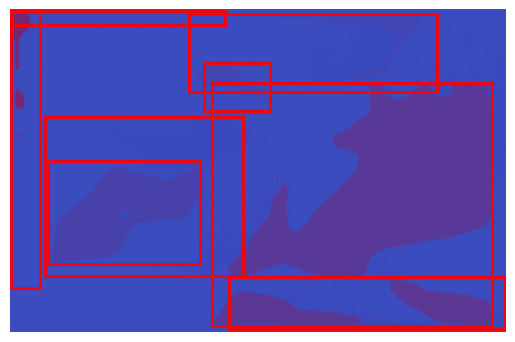

In [10]:
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = Image.open(image_path).convert("RGB")

# Transform the image for the model
transform = transforms.Compose([
    transforms.ToTensor()
])
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Run inference
with torch.no_grad():
    output = model(image_tensor)

# Extract predictions
scores = output[0]["scores"].numpy()  # Confidence scores
masks = output[0]["masks"].detach().numpy()  # Segmentation masks
boxes = output[0]["boxes"].detach().numpy()  # Bounding boxes

# Show results
plt.imshow(image)
ax = plt.gca()

# Draw bounding boxes and masks for high-confidence predictions
threshold = 0.5  # Set confidence threshold
for i in range(len(scores)):
    if scores[i] > threshold:
        # Get box coordinates
        x1, y1, x2, y2 = boxes[i]
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color="red", linewidth=2)
        ax.add_patch(rect)

        # Overlay segmentation mask
        mask = masks[i][0]
        mask = (mask > 0.5).astype(np.uint8)  # Binarize mask
        plt.imshow(mask, alpha=0.5, cmap="coolwarm")

plt.axis("off")
plt.show()
